In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import sklearn 
import warnings


In [3]:
df = pd.read_csv(r"C:\Users\hassa\Downloads\data_banknote_authentication.txt")
df.head(10)

,0,1,2,3,4
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [4]:
# Split data (input,output)
X=df.iloc[:,:4]
y=df['4']

In [5]:
# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [6]:
len(X_train)

960

## hard margin

In [31]:
hard_error=[]
#ignoring the wrangings
warnings.filterwarnings('ignore')
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
# b = Patches
b=int(len(X_train)/50)
for i in range(50):
    # instantiate classifier with default hyperparameters
    hard_margin=SVC(kernel='linear',max_iter=50,C=1) 
    # fit classifier to training set
    X_train_batch = X_train.iloc[0:b+1]
    y_train_batch = y_train.iloc[0:b+1]
    b=b+int(len(X_train)/50)
    hard_margin.fit(X_train_batch,y_train_batch)
    # make predictions on test set
    y_pred=hard_margin.predict(X_test)
    accuracy_score(y_test, y_pred)
    hard_error.append(1.0-accuracy_score(y_test, y_pred))

In [32]:
accuracy_score(y_test, y_pred)

0.9563106796116505

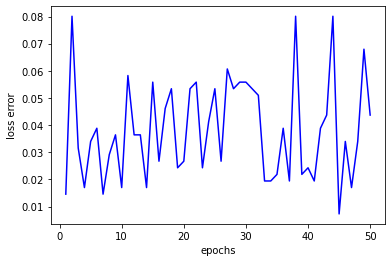

In [33]:
epochs=range(1,51)
plt.plot(epochs,hard_error,color='blue')
plt.xlabel('epochs')
plt.ylabel('loss error')
plt.show()

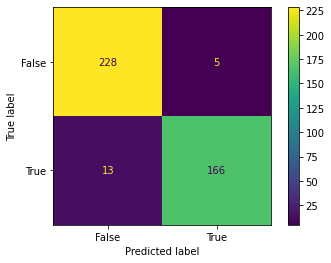

In [34]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

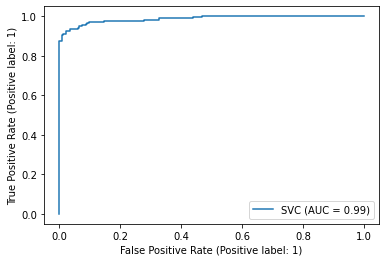

In [35]:
sklearn.metrics.plot_roc_curve(hard_margin,X_test,y_test)

## soft margin

In [36]:
soft_error=[]
#ignoring the wrangings
warnings.filterwarnings('ignore')
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
# instantiate classifier with default hyperparameters
# b = patches
b=int(len(X_train)/50)
for i in range(50):
    # instantiate classifier with default hyperparameters
    soft_margin=SVC(kernel='poly',C=1000000,max_iter=i) 
    # fit classifier to training set
    X_train_batch = X_train.iloc[0:b+1]
    y_train_batch = y_train.iloc[0:b+1]
    soft_margin.fit(X_train_batch,y_train_batch)
    b=b+int(len(X_train)/50)
    # make predictions on test set
    y_predd=soft_margin.predict(X_test)
    # compute and print accuracy score
    accuracy_score(y_test, y_predd)
    soft_error.append(1.0-accuracy_score(y_test, y_predd))

In [37]:
accuracy_score(y_test, y_predd)

0.9635922330097088

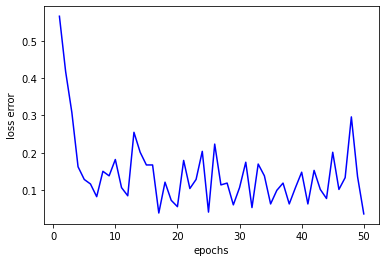

In [38]:
epochs=range(1,51)
plt.plot(epochs,soft_error,color='blue')
plt.xlabel('epochs')
plt.ylabel('loss error')
plt.show()

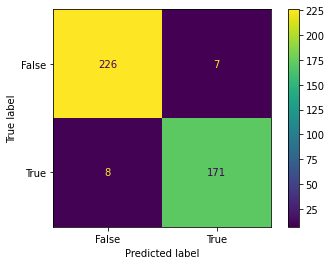

In [39]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_predd)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

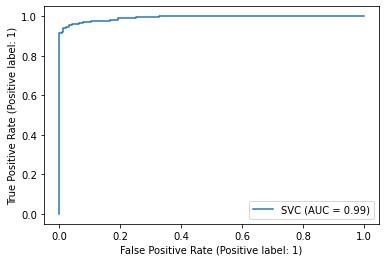

In [40]:
sklearn.metrics.plot_roc_curve(soft_margin,X_test,y_test)